In [59]:
import requests as r

In [79]:
url='https://api.covid19api.com/dayone/country/brazil';
resp=r.get(url);

In [80]:
resp.status_code

200

In [81]:
data=resp.json();

In [82]:
print(data[0]);

{'ID': '63aa488e-b4a2-4fcd-ae15-07c1ff219903', 'Country': 'Brazil', 'CountryCode': 'BR', 'Province': '', 'City': '', 'CityCode': '', 'Lat': '-14.24', 'Lon': '-51.93', 'Confirmed': 1, 'Deaths': 0, 'Recovered': 0, 'Active': 1, 'Date': '2020-02-26T00:00:00Z'}


In [83]:
new_data=[];
for i in data:
  new_data.append([i['Confirmed'],i['Deaths'],i['Recovered'],i['Active'],i['Date']]);

In [84]:
new_data.insert(0,['Confirmados','Óbitos','Recuperados','Ativos','Data']);
print(new_data);

[['Confirmados', 'Óbitos', 'Recuperados', 'Ativos', 'Data'], [1, 0, 0, 1, '2020-02-26T00:00:00Z'], [1, 0, 0, 1, '2020-02-27T00:00:00Z'], [1, 0, 0, 1, '2020-02-28T00:00:00Z'], [2, 0, 0, 2, '2020-02-29T00:00:00Z'], [2, 0, 0, 2, '2020-03-01T00:00:00Z'], [2, 0, 0, 2, '2020-03-02T00:00:00Z'], [2, 0, 0, 2, '2020-03-03T00:00:00Z'], [4, 0, 0, 4, '2020-03-04T00:00:00Z'], [4, 0, 0, 4, '2020-03-05T00:00:00Z'], [13, 0, 0, 13, '2020-03-06T00:00:00Z'], [13, 0, 0, 13, '2020-03-07T00:00:00Z'], [20, 0, 0, 20, '2020-03-08T00:00:00Z'], [25, 0, 0, 25, '2020-03-09T00:00:00Z'], [31, 0, 0, 31, '2020-03-10T00:00:00Z'], [38, 0, 0, 38, '2020-03-11T00:00:00Z'], [52, 0, 0, 52, '2020-03-12T00:00:00Z'], [151, 0, 0, 151, '2020-03-13T00:00:00Z'], [151, 0, 0, 151, '2020-03-14T00:00:00Z'], [162, 0, 0, 162, '2020-03-15T00:00:00Z'], [200, 0, 1, 199, '2020-03-16T00:00:00Z'], [321, 1, 2, 318, '2020-03-17T00:00:00Z'], [372, 3, 2, 367, '2020-03-18T00:00:00Z'], [621, 6, 2, 613, '2020-03-19T00:00:00Z'], [793, 11, 2, 780, '2020

In [85]:
for i in range(1,len(new_data)):
  new_data[i][4]=new_data[i][4][:10];
print(new_data);


[['Confirmados', 'Óbitos', 'Recuperados', 'Ativos', 'Data'], [1, 0, 0, 1, '2020-02-26'], [1, 0, 0, 1, '2020-02-27'], [1, 0, 0, 1, '2020-02-28'], [2, 0, 0, 2, '2020-02-29'], [2, 0, 0, 2, '2020-03-01'], [2, 0, 0, 2, '2020-03-02'], [2, 0, 0, 2, '2020-03-03'], [4, 0, 0, 4, '2020-03-04'], [4, 0, 0, 4, '2020-03-05'], [13, 0, 0, 13, '2020-03-06'], [13, 0, 0, 13, '2020-03-07'], [20, 0, 0, 20, '2020-03-08'], [25, 0, 0, 25, '2020-03-09'], [31, 0, 0, 31, '2020-03-10'], [38, 0, 0, 38, '2020-03-11'], [52, 0, 0, 52, '2020-03-12'], [151, 0, 0, 151, '2020-03-13'], [151, 0, 0, 151, '2020-03-14'], [162, 0, 0, 162, '2020-03-15'], [200, 0, 1, 199, '2020-03-16'], [321, 1, 2, 318, '2020-03-17'], [372, 3, 2, 367, '2020-03-18'], [621, 6, 2, 613, '2020-03-19'], [793, 11, 2, 780, '2020-03-20'], [1021, 15, 2, 1004, '2020-03-21'], [1546, 25, 2, 1519, '2020-03-22'], [1924, 34, 2, 1888, '2020-03-23'], [2247, 46, 2, 2199, '2020-03-24'], [2554, 59, 2, 2493, '2020-03-25'], [2985, 77, 6, 2902, '2020-03-26'], [3417, 92,

In [86]:
import datetime as dt

In [87]:
import csv;
with open('brasil-covid19.csv','w',encoding='utf-8') as file:
  write=csv.writer(file);
  write.writerows(new_data);

In [88]:
for i in range(1,len(new_data)):
  new_data[i][4]=dt.datetime.strptime(new_data[i][4],'%Y-%m-%d')

In [89]:
def get_datasets(y,labels):
  if type(y[0])==list:
    datasets=[];
    for i in range(len(y)):
      datasets.append({
          'label':labels[i],
          'data':y[i]
      })
    return datasets
  else:
    return [
        {
          'label':labels[0],
          'data':y
        }
        ];

In [90]:
def set_title(title=''):
  if title !='':
    display='true'
  else:
    display='false'
  return{
      'title':title,
      'display':display
  }  

In [91]:
def create_chart(x,y,labels,kind='bar',title=''):
  datasets=get_datasets(y,labels);
  option= set_title(title);
  chart ={
      'type':kind,
      'data':{
          'labels':x,
          'datasets':datasets
      },
      'option':option
  };
  return chart

In [97]:
def get_api_chart(chart):
  url_base='https://quickchart.io/chart';
  resp = r.get(f'{url_base}?c={str(chart)}');
  return resp.content

In [93]:
def save_image(path,content):
  with open(path,'wb') as image:
    image.write(content);


In [94]:
from PIL import Image
from IPython.display import display

In [95]:
def display_image(path):
  img_pil =Image.open(path)
  display(img_pil)

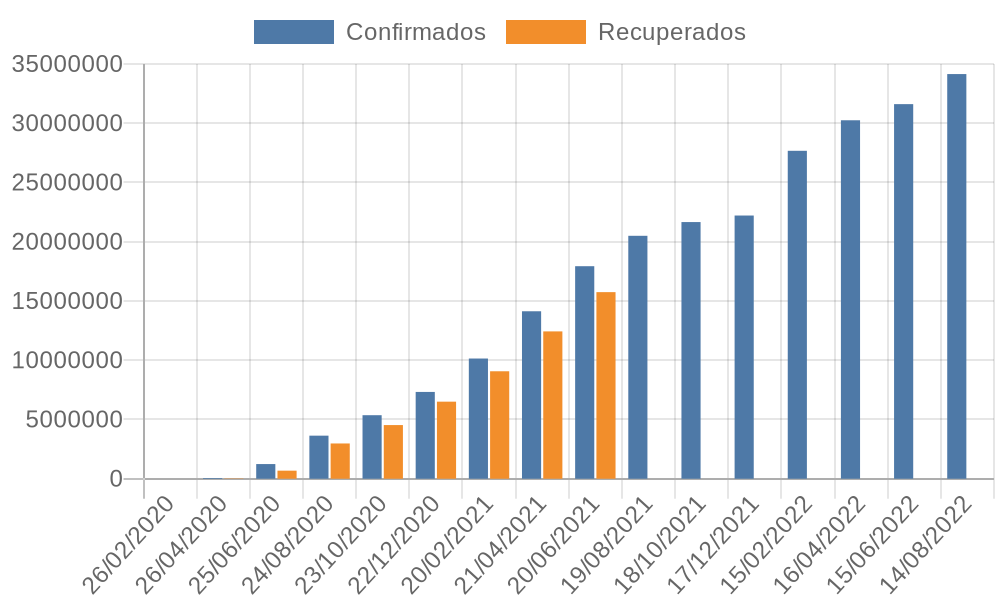

In [101]:
y_data_1=[];
for i in new_data[1::60]:
  y_data_1.append(i[0]);

y_data_2=[];
for i in new_data[1::60]:
  y_data_2.append(i[2]);

labels=['Confirmados','Recuperados'];

x=[];
for i in new_data[1::60]:
  x.append(i[4].strftime('%d/%m/%Y'));

chart = create_chart(x,[y_data_1,y_data_2], labels, title='Grafico Confirmados x Recuperados Bimestral');
chart_content = get_api_chart(chart);
save_image('graficoSalvo.png', chart_content);
display_image('graficoSalvo.png');


In [102]:
from urllib.parse import quote

In [103]:
def get_api_qrcode(link):
  text=quote(link) #parsing do link para url
  url_base='https://quickchart.io/qr'
  resp = r.get(f'{url_base}?text={text}');
  return resp.content

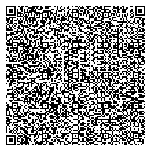

In [104]:
url_base='https://quickchart.io/chart';
link=f'{url_base}?c={str(chart)}';
save_image('qr-code.png',get_api_qrcode(link));
display_image('qr-code.png');    